# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading Data

In [2]:
dataset = pd.read_csv('amex_data/train_data_with_samplefeatures.csv')

In [3]:
print(dataset.shape)
dataset.head()

(948, 26)


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,...,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571,0.777778,0.826481,0.993789
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,...,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000,1.000000,1.158036,1.048220
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,...,2023,251,0.857143,0.672131,173.266667,0.0,154.333333,0.866667,0.738218,0.993789
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,Ga An Ws,...,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000,2.125000,1.119625,0.993789
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,...,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000,0.933333,1.367818,0.993789


# Preprocessing

## Toss winner team 1?

In [4]:
t1_toss_win = []
for i in range(0, dataset.shape[0]):
    if dataset['toss winner'][i] == dataset['team1'][i]:
        t1_toss_win.append(1)
    else:
        t1_toss_win.append(0)

In [5]:
dataset['toss winner'] = t1_toss_win # Toss winner is now a binary feature (1 if toss winner is team 1, 0 otherwise)
dataset.rename(columns={"toss winner": "t1_toss_win"}, inplace=True)

In [6]:
print(dataset.shape)
dataset.head()

(948, 26)


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,t1_toss_win,...,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,0,...,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571,0.777778,0.826481,0.993789
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,0,...,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000,1.000000,1.158036,1.048220
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,0,...,2023,251,0.857143,0.672131,173.266667,0.0,154.333333,0.866667,0.738218,0.993789
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,1,...,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000,2.125000,1.119625,0.993789
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,0,...,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000,0.933333,1.367818,0.993789


## Dropping other

In [7]:
dataset.drop(['team1','team2','winner'], axis=1, inplace=True)

In [8]:
print(dataset.shape)
dataset.head()

(948, 23)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_toss_win,toss decision,venue,city,...,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,0,field,Hr Ct Sm Ie,Indore,...,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571,0.777778,0.826481,0.993789
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,0,field,Kn Ol Bn Bs,Bridgetown,...,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000,1.000000,1.158036,1.048220
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,0,field,Tt Be Nm,Nottingham,...,2023,251,0.857143,0.672131,173.266667,0.0,154.333333,0.866667,0.738218,0.993789
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,bat,Bn La Sm Ta Td,Tarouba,...,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000,2.125000,1.119625,0.993789
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,0,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,...,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000,0.933333,1.367818,0.993789


## Taking care of NA values (=0)

In [9]:
for i in dataset.columns:
    print("# Nulls in column", i, ': ', dataset[i].isnull().sum())

# Nulls in column match id :  0
# Nulls in column team1_id :  0
# Nulls in column team1_roster_ids :  0
# Nulls in column team2_id :  0
# Nulls in column team2_roster_ids :  0
# Nulls in column winner_id :  0
# Nulls in column t1_toss_win :  0
# Nulls in column toss decision :  0
# Nulls in column venue :  0
# Nulls in column city :  0
# Nulls in column match_dt :  0
# Nulls in column lighting :  0
# Nulls in column series_name :  0
# Nulls in column season :  0
# Nulls in column ground_id :  0
# Nulls in column team_count_50runs_last15 :  0
# Nulls in column team_winp_last5 :  0
# Nulls in column team1only_avg_runs_last15 :  21
# Nulls in column team1_winp_team2_last15 :  0
# Nulls in column ground_avg_runs_last15 :  53
# Nulls in column team_count_30runs_last15 :  0
# Nulls in column avg_sr_ratio :  32
# Nulls in column avg_runs_ratio :  0


In [10]:
dataset['ground_avg_runs_last15'].fillna(160, inplace=True)
dataset['avg_sr_ratio'].fillna(1, inplace=True)
df = dataset.fillna(0)

## Changing date to year and dropping season

In [11]:
df.insert(10, 'year', df['match_dt'].apply(lambda x: x[-4:]))

In [12]:
df.drop(['match_dt','season'], axis=1, inplace=True)

In [13]:
print(df.shape)
df.head()

(948, 22)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_toss_win,toss decision,venue,city,...,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,0,field,Hr Ct Sm Ie,Indore,...,Sd Mq Ai Ty,7398,1.666667,0.672131,139.000000,100.0,157.178571,0.777778,0.826481,0.993789
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,0,field,Kn Ol Bn Bs,Bridgetown,...,Ed tr of Wt Is,1406,1.285714,1.952381,156.000000,50.0,103.500000,1.000000,1.158036,1.048220
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,0,field,Tt Be Nm,Nottingham,...,Vy Bt,251,0.857143,0.672131,173.266667,0.0,154.333333,0.866667,0.738218,0.993789
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,bat,Bn La Sm Ta Td,Tarouba,...,Cn Pr Le,14300,2.166667,1.975610,164.266667,50.0,144.250000,2.125000,1.119625,0.993789
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,0,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,...,In Pr Le,7118,0.818182,1.327869,164.666667,0.0,189.000000,0.933333,1.367818,0.993789


## Serires Name Analysis

In [14]:
check_x = []
for i in range(df['series_name'].unique().size):
    check_x.append(df['series_name'].value_counts()[i])

In [15]:
len(check_x)

85

In [16]:
df['series_name'].unique().size

85

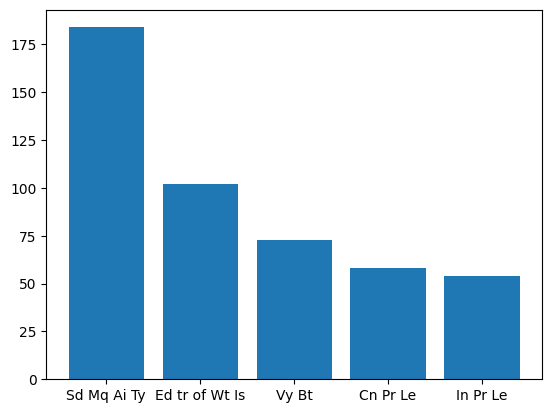

In [17]:
plt.bar(df['series_name'].unique()[0:5], check_x[0:5])
plt.show()

In [18]:
df['ground_id'].unique().size

123

In [19]:
print(df.shape)
df.head()

(948, 22)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_toss_win,toss decision,venue,city,...,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,0,field,Hr Ct Sm Ie,Indore,...,Sd Mq Ai Ty,7398,1.666667,0.672131,139.000000,100.0,157.178571,0.777778,0.826481,0.993789
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,0,field,Kn Ol Bn Bs,Bridgetown,...,Ed tr of Wt Is,1406,1.285714,1.952381,156.000000,50.0,103.500000,1.000000,1.158036,1.048220
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,0,field,Tt Be Nm,Nottingham,...,Vy Bt,251,0.857143,0.672131,173.266667,0.0,154.333333,0.866667,0.738218,0.993789
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,bat,Bn La Sm Ta Td,Tarouba,...,Cn Pr Le,14300,2.166667,1.975610,164.266667,50.0,144.250000,2.125000,1.119625,0.993789
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,0,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,...,In Pr Le,7118,0.818182,1.327869,164.666667,0.0,189.000000,0.933333,1.367818,0.993789


## Team 1 batting first?

In [20]:
t1_bat_first = []

In [21]:
for i in range(df['toss decision'].size):
    if df['toss decision'][i] == 'bat':
        if df['t1_toss_win'][i] == 1:
            t1_bat_first.append(1)
        elif df['t1_toss_win'][i] == 0:
            t1_bat_first.append(0)

    if df['toss decision'][i] == 'field':
        if df['t1_toss_win'][i] == 1:
            t1_bat_first.append(0)
        elif df['t1_toss_win'][i] == 0:
            t1_bat_first.append(1)

In [22]:
df.insert(6, 't1_batting_first', t1_bat_first)
df.drop(['toss decision'], axis=1, inplace=True) 

In [23]:
print(df.shape)
df.head()

(948, 22)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_batting_first,t1_toss_win,venue,city,...,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,1,0,Hr Ct Sm Ie,Indore,...,Sd Mq Ai Ty,7398,1.666667,0.672131,139.000000,100.0,157.178571,0.777778,0.826481,0.993789
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,1,0,Kn Ol Bn Bs,Bridgetown,...,Ed tr of Wt Is,1406,1.285714,1.952381,156.000000,50.0,103.500000,1.000000,1.158036,1.048220
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,1,0,Tt Be Nm,Nottingham,...,Vy Bt,251,0.857143,0.672131,173.266667,0.0,154.333333,0.866667,0.738218,0.993789
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,1,Bn La Sm Ta Td,Tarouba,...,Cn Pr Le,14300,2.166667,1.975610,164.266667,50.0,144.250000,2.125000,1.119625,0.993789
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,1,0,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,...,In Pr Le,7118,0.818182,1.327869,164.666667,0.0,189.000000,0.933333,1.367818,0.993789


## Team 1 win or no

In [24]:
t1_win = []

In [25]:
for i in range(df['t1_batting_first'].size):
    if df['team1_id'][i] == df['winner_id'][i]:
        t1_win.append(1)
    else:
        t1_win.append(0)

In [26]:
df.insert(6, 't1_win', t1_win)

In [27]:
print(df.shape)
df.head()

(948, 23)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_win,t1_batting_first,t1_toss_win,venue,...,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,0,1,0,Hr Ct Sm Ie,...,Sd Mq Ai Ty,7398,1.666667,0.672131,139.000000,100.0,157.178571,0.777778,0.826481,0.993789
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,1,1,0,Kn Ol Bn Bs,...,Ed tr of Wt Is,1406,1.285714,1.952381,156.000000,50.0,103.500000,1.000000,1.158036,1.048220
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,1,1,0,Tt Be Nm,...,Vy Bt,251,0.857143,0.672131,173.266667,0.0,154.333333,0.866667,0.738218,0.993789
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,1,1,Bn La Sm Ta Td,...,Cn Pr Le,14300,2.166667,1.975610,164.266667,50.0,144.250000,2.125000,1.119625,0.993789
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,0,1,0,Pb Ct An IS Ba Sm Mi Ch,...,In Pr Le,7118,0.818182,1.327869,164.666667,0.0,189.000000,0.933333,1.367818,0.993789


## Test 1 Prep

In [28]:
df.drop(['venue', 'city', 'series_name', 'team1_roster_ids', 'team2_roster_ids', 'year', 'ground_id', 'lighting'], axis=1, inplace=True)

In [29]:
print(df.shape)
df.head(10)

(948, 15)


,match id,team1_id,team2_id,winner_id,t1_win,t1_batting_first,t1_toss_win,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9331181,11283,12634,12634,0,1,0,1.666667,0.672131,139.000000,100.0,157.178571,0.777778,0.826481,0.993789
1,8797060,20,41,20,1,1,0,1.285714,1.952381,156.000000,50.0,103.500000,1.000000,1.158036,1.048220
2,9433269,10576,8987,10576,1,1,0,0.857143,0.672131,173.266667,0.0,154.333333,0.866667,0.738218,0.993789
3,9587073,36084,36070,36084,1,1,1,2.166667,1.975610,164.266667,50.0,144.250000,2.125000,1.119625,0.993789
4,9516457,30407,48341,48341,0,1,0,0.818182,1.327869,164.666667,0.0,189.000000,0.933333,1.367818,0.993789
5,9457412,42573,40424,40424,0,1,0,1.000000,1.000000,158.444444,50.0,147.933333,1.000000,0.795166,0.993789
6,9292548,27,55,55,0,1,0,0.700000,1.487805,141.400000,50.0,160.000000,0.894737,1.466136,1.053211
7,9271758,47501,47494,47501,1,1,1,0.909091,1.487805,156.153846,40.0,129.933333,1.473684,0.980539,0.993789
8,9331048,12634,14860,12634,1,1,0,0.272727,0.506173,138.500000,0.0,157.692308,0.642857,0.859751,0.993789
9,9123162,216,55,55,0,1,0,0.347826,0.506173,154.266667,0.0,148.500000,0.571429,0.934404,0.729316


In [30]:
df['t1_batting_first'].value_counts()

t1_batting_first
1    948
Name: count, dtype: int64

In [31]:
# df.columns.get_loc('ground_id')

In [32]:
df = df.sample(frac=0.5)    #.reset_index(drop=True)

In [33]:
# X = df.iloc[:, -5:].values
X = df.iloc[:, 7:].values
y = df.iloc[:, 4].values

# Model Training

## Train Test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling

In [35]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [36]:
cat_features = []

## Training

In [37]:
import catboost as cb
from sklearn.metrics import log_loss
import optuna

def objective(trial):
    params = {
        "iterations": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 20),
    }

    model = cb.CatBoostClassifier(**params, silent=True)
    model.fit(X_train, y_train, cat_features=cat_features)
    predictions = model.predict(X_test)
    ll = log_loss(y_test, predictions)
    return ll

c:\Drive_D\ArhatPersonal\mlenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

[I 2024-06-30 13:51:07,028] A new study created in memory with name: no-name-4de7dfce-b0f8-4744-b7ff-dc4789a65fa7
[I 2024-06-30 13:51:30,304] Trial 0 finished with value: 12.899833844526139 and parameters: {'learning_rate': 0.012654556383698357, 'depth': 7, 'subsample': 0.6542848600893734, 'colsample_bylevel': 0.8766274842523987, 'min_data_in_leaf': 19}. Best is trial 0 with value: 12.899833844526139.
[I 2024-06-30 13:51:47,028] Trial 1 finished with value: 12.52042696674596 and parameters: {'learning_rate': 0.004221013937202977, 'depth': 6, 'subsample': 0.213648439614688, 'colsample_bylevel': 0.7828665981108199, 'min_data_in_leaf': 11}. Best is trial 1 with value: 12.52042696674596.
[I 2024-06-30 13:55:44,348] Trial 2 finished with value: 14.796868233427043 and parameters: {'learning_rate': 0.001248983655568032, 'depth': 10, 'subsample': 0.39019348941911725, 'colsample_bylevel': 0.4416514702749054, 'min_data_in_leaf': 8}. Best is trial 1 with value: 12.52042696674596.
[I 2024-06-30 13

In [39]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.004221013937202977, 'depth': 6, 'subsample': 0.213648439614688, 'colsample_bylevel': 0.7828665981108199, 'min_data_in_leaf': 11}
Best RMSE: 12.52042696674596


In [40]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(learning_rate=study.best_params['learning_rate'], depth=study.best_params['depth'], subsample=study.best_params['subsample'], colsample_bylevel=study.best_params['colsample_bylevel'], min_data_in_leaf=study.best_params['min_data_in_leaf'], iterations=10000, silent=True)
classifier.fit(X_train, y_train, cat_features=cat_features)

## Accuracy Score

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29 13]
 [20 33]]


0.6526315789473685

# Test Data

In [69]:
dataset_test = pd.read_csv('amex_data/r2_data_with_samplefeatures.csv')

In [70]:
print(dataset_test.shape)
dataset_test.head()

(207, 24)


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,...,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9272619,Me Ss,33949,4003390.0:7960994.0:3901078.0:2669316.0:373710...,Ht Hs,33928,5843200.0:4223883.0:4655384.0:6249256.0:216159...,Ht Hs,field,Be Ol Ht,...,2022/23,6348,0.666667,1.000000,167.933333,60.0,154.115385,0.484848,0.733516,0.993789
1,9086958,Na,209,5836452.0:8246468.0:7500324.0:3065502.0:363350...,Si La,69,7200598.0:4403531.0:3260564.0:2420760.0:239834...,Si La,field,GA Sm Sh Gg Va,...,2022/23,3961,0.142857,0.207921,141.888889,0.0,142.833333,0.205882,0.992753,0.993789
2,9433654,Gn,7573,5164844.0:8110185.0:2979857.0:1722048.0:270743...,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:481700...,St,field,Sa Gs Cf,...,2023,4521,0.666667,0.344262,178.800000,0.0,155.733333,0.696970,0.675354,1.320702
3,9097248,Ks,22784,3496933.0:4167673.0:4160316.0:1863889.0:310883...,Ds,22763,3399745.0:4898074.0:3782225.0:2252452.0:223190...,Ks,bat,St Gs Pk Pt Eh,...,2021/22,1224,0.500000,0.259259,138.000000,0.0,142.500000,1.000000,0.709388,0.993789
4,9097234,Ws,23841,4166882.0:3009215.0:1963443.0:3252927.0:417185...,Ts,23750,2654014.0:2667223.0:3406717.0:3057312.0:415964...,Ts,field,St Gs Pk Pt Eh,...,2021/22,1224,0.166667,1.000000,155.800000,100.0,NaN,0.583333,1.207753,0.993789


## Toss Winner = Team 1?

In [71]:
t1_toss_win_test = []
for i in range(0, dataset_test.shape[0]):
    if dataset_test['toss winner'][i] == dataset_test['team1'][i]:
        t1_toss_win_test.append(1)
    else:
        t1_toss_win_test.append(0)

dataset_test['toss winner'] = t1_toss_win_test
dataset_test.rename(columns={"toss winner": "t1_toss_win"}, inplace=True)

In [72]:
print(dataset_test.shape)
dataset_test.head()

(207, 24)


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,t1_toss_win,toss decision,venue,...,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9272619,Me Ss,33949,4003390.0:7960994.0:3901078.0:2669316.0:373710...,Ht Hs,33928,5843200.0:4223883.0:4655384.0:6249256.0:216159...,0,field,Be Ol Ht,...,2022/23,6348,0.666667,1.000000,167.933333,60.0,154.115385,0.484848,0.733516,0.993789
1,9086958,Na,209,5836452.0:8246468.0:7500324.0:3065502.0:363350...,Si La,69,7200598.0:4403531.0:3260564.0:2420760.0:239834...,0,field,GA Sm Sh Gg Va,...,2022/23,3961,0.142857,0.207921,141.888889,0.0,142.833333,0.205882,0.992753,0.993789
2,9433654,Gn,7573,5164844.0:8110185.0:2979857.0:1722048.0:270743...,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:481700...,0,field,Sa Gs Cf,...,2023,4521,0.666667,0.344262,178.800000,0.0,155.733333,0.696970,0.675354,1.320702
3,9097248,Ks,22784,3496933.0:4167673.0:4160316.0:1863889.0:310883...,Ds,22763,3399745.0:4898074.0:3782225.0:2252452.0:223190...,1,bat,St Gs Pk Pt Eh,...,2021/22,1224,0.500000,0.259259,138.000000,0.0,142.500000,1.000000,0.709388,0.993789
4,9097234,Ws,23841,4166882.0:3009215.0:1963443.0:3252927.0:417185...,Ts,23750,2654014.0:2667223.0:3406717.0:3057312.0:415964...,0,field,St Gs Pk Pt Eh,...,2021/22,1224,0.166667,1.000000,155.800000,100.0,NaN,0.583333,1.207753,0.993789


## Dropping Names

In [73]:
dataset_test.drop(['team1','team2'], axis=1, inplace=True)

In [74]:
print(dataset_test.shape)
dataset_test.head()

(207, 22)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,t1_toss_win,toss decision,venue,city,match_dt,...,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9272619,33949,4003390.0:7960994.0:3901078.0:2669316.0:373710...,33928,5843200.0:4223883.0:4655384.0:6249256.0:216159...,0,field,Be Ol Ht,Hobart,09-01-2023,...,2022/23,6348,0.666667,1.000000,167.933333,60.0,154.115385,0.484848,0.733516,0.993789
1,9086958,209,5836452.0:8246468.0:7500324.0:3065502.0:363350...,69,7200598.0:4403531.0:3260564.0:2420760.0:239834...,0,field,GA Sm Sh Gg Va,Geelong,16-10-2022,...,2022/23,3961,0.142857,0.207921,141.888889,0.0,142.833333,0.205882,0.992753,0.993789
2,9433654,7573,5164844.0:8110185.0:2979857.0:1722048.0:270743...,9701,6139370.0:7694581.0:3294444.0:3239102.0:481700...,0,field,Sa Gs Cf,Cardiff,21-06-2023,...,2023,4521,0.666667,0.344262,178.800000,0.0,155.733333,0.696970,0.675354,1.320702
3,9097248,22784,3496933.0:4167673.0:4160316.0:1863889.0:310883...,22763,3399745.0:4898074.0:3782225.0:2252452.0:223190...,1,bat,St Gs Pk Pt Eh,Port Elizabeth,08-02-2022,...,2021/22,1224,0.500000,0.259259,138.000000,0.0,142.500000,1.000000,0.709388,0.993789
4,9097234,23841,4166882.0:3009215.0:1963443.0:3252927.0:417185...,23750,2654014.0:2667223.0:3406717.0:3057312.0:415964...,0,field,St Gs Pk Pt Eh,Port Elizabeth,07-02-2022,...,2021/22,1224,0.166667,1.000000,155.800000,100.0,NaN,0.583333,1.207753,0.993789


## NA values to 0

In [75]:
dataset_test['ground_avg_runs_last15'].fillna(160, inplace=True)
dataset_test['avg_sr_ratio'].fillna(1, inplace=True)
df_test = dataset_test.fillna(0)

In [76]:
print(df_test.shape)
df_test.head()

(207, 22)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,t1_toss_win,toss decision,venue,city,match_dt,...,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9272619,33949,4003390.0:7960994.0:3901078.0:2669316.0:373710...,33928,5843200.0:4223883.0:4655384.0:6249256.0:216159...,0,field,Be Ol Ht,Hobart,09-01-2023,...,2022/23,6348,0.666667,1.000000,167.933333,60.0,154.115385,0.484848,0.733516,0.993789
1,9086958,209,5836452.0:8246468.0:7500324.0:3065502.0:363350...,69,7200598.0:4403531.0:3260564.0:2420760.0:239834...,0,field,GA Sm Sh Gg Va,Geelong,16-10-2022,...,2022/23,3961,0.142857,0.207921,141.888889,0.0,142.833333,0.205882,0.992753,0.993789
2,9433654,7573,5164844.0:8110185.0:2979857.0:1722048.0:270743...,9701,6139370.0:7694581.0:3294444.0:3239102.0:481700...,0,field,Sa Gs Cf,Cardiff,21-06-2023,...,2023,4521,0.666667,0.344262,178.800000,0.0,155.733333,0.696970,0.675354,1.320702
3,9097248,22784,3496933.0:4167673.0:4160316.0:1863889.0:310883...,22763,3399745.0:4898074.0:3782225.0:2252452.0:223190...,1,bat,St Gs Pk Pt Eh,Port Elizabeth,08-02-2022,...,2021/22,1224,0.500000,0.259259,138.000000,0.0,142.500000,1.000000,0.709388,0.993789
4,9097234,23841,4166882.0:3009215.0:1963443.0:3252927.0:417185...,23750,2654014.0:2667223.0:3406717.0:3057312.0:415964...,0,field,St Gs Pk Pt Eh,Port Elizabeth,07-02-2022,...,2021/22,1224,0.166667,1.000000,155.800000,100.0,160.000000,0.583333,1.207753,0.993789


## date to year

In [77]:
df_test.insert(9, 'year', df_test['match_dt'].apply(lambda x: x[-4:]))

In [78]:
df_test.drop(['match_dt','season'], axis=1, inplace=True)

In [79]:
print(df_test.shape)
df_test.head()

(207, 21)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,t1_toss_win,toss decision,venue,city,year,...,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9272619,33949,4003390.0:7960994.0:3901078.0:2669316.0:373710...,33928,5843200.0:4223883.0:4655384.0:6249256.0:216159...,0,field,Be Ol Ht,Hobart,2023,...,Bg Bh Le,6348,0.666667,1.000000,167.933333,60.0,154.115385,0.484848,0.733516,0.993789
1,9086958,209,5836452.0:8246468.0:7500324.0:3065502.0:363350...,69,7200598.0:4403531.0:3260564.0:2420760.0:239834...,0,field,GA Sm Sh Gg Va,Geelong,2022,...,Si La tr of Aa,3961,0.142857,0.207921,141.888889,0.0,142.833333,0.205882,0.992753,0.993789
2,9433654,7573,5164844.0:8110185.0:2979857.0:1722048.0:270743...,9701,6139370.0:7694581.0:3294444.0:3239102.0:481700...,0,field,Sa Gs Cf,Cardiff,2023,...,Vy Bt,4521,0.666667,0.344262,178.800000,0.0,155.733333,0.696970,0.675354,1.320702
3,9097248,22784,3496933.0:4167673.0:4160316.0:1863889.0:310883...,22763,3399745.0:4898074.0:3782225.0:2252452.0:223190...,1,bat,St Gs Pk Pt Eh,Port Elizabeth,2022,...,CA T0 Ce,1224,0.500000,0.259259,138.000000,0.0,142.500000,1.000000,0.709388,0.993789
4,9097234,23841,4166882.0:3009215.0:1963443.0:3252927.0:417185...,23750,2654014.0:2667223.0:3406717.0:3057312.0:415964...,0,field,St Gs Pk Pt Eh,Port Elizabeth,2022,...,CA T0 Ce,1224,0.166667,1.000000,155.800000,100.0,160.000000,0.583333,1.207753,0.993789


## T1 Batting First?

In [80]:
t1_bat_first_test = []

In [81]:
for i in range(df_test['toss decision'].size):
    if df_test['toss decision'][i] == 'bat':
        if df_test['t1_toss_win'][i] == 1:
            t1_bat_first_test.append(1)
        if df_test['t1_toss_win'][i] == 0:
            t1_bat_first_test.append(0)

    if df_test['toss decision'][i] == 'field':
        if df_test['t1_toss_win'][i] == 1:
            t1_bat_first_test.append(0)
        if df_test['t1_toss_win'][i] == 0:
            t1_bat_first_test.append(1)

In [82]:
df_test.insert(5, 't1_batting_first', t1_bat_first_test)
df_test.drop(['toss decision'], axis=1, inplace=True) 

In [83]:
print(df_test.shape)
df_test.head()

(207, 21)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,t1_batting_first,t1_toss_win,venue,city,year,...,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9272619,33949,4003390.0:7960994.0:3901078.0:2669316.0:373710...,33928,5843200.0:4223883.0:4655384.0:6249256.0:216159...,1,0,Be Ol Ht,Hobart,2023,...,Bg Bh Le,6348,0.666667,1.000000,167.933333,60.0,154.115385,0.484848,0.733516,0.993789
1,9086958,209,5836452.0:8246468.0:7500324.0:3065502.0:363350...,69,7200598.0:4403531.0:3260564.0:2420760.0:239834...,1,0,GA Sm Sh Gg Va,Geelong,2022,...,Si La tr of Aa,3961,0.142857,0.207921,141.888889,0.0,142.833333,0.205882,0.992753,0.993789
2,9433654,7573,5164844.0:8110185.0:2979857.0:1722048.0:270743...,9701,6139370.0:7694581.0:3294444.0:3239102.0:481700...,1,0,Sa Gs Cf,Cardiff,2023,...,Vy Bt,4521,0.666667,0.344262,178.800000,0.0,155.733333,0.696970,0.675354,1.320702
3,9097248,22784,3496933.0:4167673.0:4160316.0:1863889.0:310883...,22763,3399745.0:4898074.0:3782225.0:2252452.0:223190...,1,1,St Gs Pk Pt Eh,Port Elizabeth,2022,...,CA T0 Ce,1224,0.500000,0.259259,138.000000,0.0,142.500000,1.000000,0.709388,0.993789
4,9097234,23841,4166882.0:3009215.0:1963443.0:3252927.0:417185...,23750,2654014.0:2667223.0:3406717.0:3057312.0:415964...,1,0,St Gs Pk Pt Eh,Port Elizabeth,2022,...,CA T0 Ce,1224,0.166667,1.000000,155.800000,100.0,160.000000,0.583333,1.207753,0.993789


## To predict now

In [84]:
df_test.drop(['venue', 'city', 'series_name', 'team1_roster_ids', 'team2_roster_ids'], axis=1, inplace=True)

In [85]:
print(df_test.shape)
df_test.head()

(207, 16)


,match id,team1_id,team2_id,t1_batting_first,t1_toss_win,year,lighting,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_30runs_last15,avg_sr_ratio,avg_runs_ratio
0,9272619,33949,33928,1,0,2023,night match,6348,0.666667,1.000000,167.933333,60.0,154.115385,0.484848,0.733516,0.993789
1,9086958,209,69,1,0,2022,day/night match,3961,0.142857,0.207921,141.888889,0.0,142.833333,0.205882,0.992753,0.993789
2,9433654,7573,9701,1,0,2023,day/night match,4521,0.666667,0.344262,178.800000,0.0,155.733333,0.696970,0.675354,1.320702
3,9097248,22784,22763,1,1,2022,day match,1224,0.500000,0.259259,138.000000,0.0,142.500000,1.000000,0.709388,0.993789
4,9097234,23841,23750,1,0,2022,day match,1224,0.166667,1.000000,155.800000,100.0,160.000000,0.583333,1.207753,0.993789


In [87]:
X_pred = df_test.iloc[:, 8:].values
# X_pred[:, 3:] = sc.transform(X_pred[:, 3:])

In [88]:
y_pred_test = classifier.predict(X_pred)

# Preparing Submission File

## X final

In [89]:
X_final = np.concatenate((X_pred, X), axis=0)

## Y final

In [90]:
y_pred_train = classifier.predict(X)

In [121]:
y_final_train = []
for i in range(y_pred_test.size):
    if y_pred_test[i] == 1:
        y_final_train.append(df_test['team1_id'][i])
    else:
        y_final_train.append(df_test['team2_id'][i])

In [ ]:
y_final_test = []
for i in range(y_pred_test.size):
    if y_pred_test[i] == 1:
        y_final_test.append(df_test['team1_id'][i])

    else:
        y_final_test.append(df_test['team2_id'][i])

In [ ]:
y_final = np.concatenate((y_final_test, y_final_train), axis=0)
y_final.shape

## Match ID

In [112]:
match_id = list(df_test['match id'])
# match_id.extend(df['match id'])
match_id = np.array(match_id)
match_id

array([9272619, 9086958, 9433654, 9097248, 9097234, 9516555, 9587129,
       9615003, 9185406, 9128790, 9457657, 9837204, 9272794, 9489437,
       9272535, 9586982, 8844310, 8797081, 9084809, 9516576, 9484488,
       9250317, 9097430, 9249183, 9433731, 9097339, 9128818, 9084641,
       9837260, 9489374, 9433661, 9684282, 9684695, 9490060, 9076850,
       9084977, 9271674, 9094287, 9457440, 9084928, 9484558, 9830764,
       9438281, 8887724, 9702755, 9085026, 9489409, 9407691, 9887856,
       9331230, 9290896, 9051167, 9702741, 9128587, 9352349, 9388553,
       9587122, 8950766, 9490067, 9433143, 9271709, 9856741, 9084627,
       9587150, 9084865, 9085404, 9388448, 9128811, 9271660, 8887696,
       9097311, 9271793, 8887815, 9433668, 9128671, 9330453, 9085194,
       9352237, 9587108, 9225355, 9094434, 9866387, 9849706, 9433423,
       9085390, 9084872, 9433101, 9084991, 9272521, 9433087, 9684184,
       9388560, 9793832, 9097381, 9433822, 9702804, 9128447, 9830771,
       8887738, 9516

In [113]:
match_id.shape

(207,)

## Dataset Type

In [106]:
dataset_type = []
for i in range(len(y_pred_test)):
    dataset_type.append('r1')

dataset_type = np.array(dataset_type)

In [111]:
dataset_type.shape

(207,)

## Win Pred Score

In [95]:
win_score = []
for i in range(len(y_pred_test)):
    win_score.append(max(classifier.predict_proba(X_pred[i])))

win_score = np.array(win_score)

In [96]:
win_score

array([0.96056288, 0.9761416 , 0.63262108, 0.92202135, 0.84946134,
       0.88360752, 0.58369366, 0.96335031, 0.72148301, 0.9740541 ,
       0.82578281, 0.79103104, 0.52501641, 0.50794708, 0.90370761,
       0.88115499, 0.89745126, 0.79734374, 0.89714585, 0.65642209,
       0.65168907, 0.835686  , 0.5506337 , 0.63676678, 0.91539289,
       0.92629679, 0.62459328, 0.9335624 , 0.94758355, 0.95047156,
       0.51823458, 0.962879  , 0.96784387, 0.52857923, 0.81804928,
       0.67473609, 0.89455213, 0.80143782, 0.74716206, 0.80867467,
       0.50619907, 0.6853875 , 0.50243742, 0.58464569, 0.65811577,
       0.84241133, 0.72884052, 0.59962141, 0.64325408, 0.70077316,
       0.69542403, 0.60570943, 0.93726522, 0.69169132, 0.61978952,
       0.94992352, 0.91839279, 0.65579333, 0.5672897 , 0.56243674,
       0.98024287, 0.7823022 , 0.70493893, 0.87701116, 0.91547556,
       0.66380656, 0.68731851, 0.74336915, 0.87367651, 0.91186963,
       0.62318704, 0.85449566, 0.87755169, 0.88047567, 0.54343

## Train algorithm

In [98]:
algo = "catboost"
train_algo = []
for i in range(len(y_pred_test)):
    train_algo.append(algo)

train_algo = np.array(train_algo)

In [99]:
train_algo

array(['catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboost',
       'catboost', 'catboost', 'catboost', 'catboost', 'catboo

## Is Ensemble

In [100]:
ensemble = "no"
is_ensemble = []
for i in range(len(y_pred_test)):
    is_ensemble.append(ensemble)

is_ensemble = np.array(is_ensemble)

In [101]:
classifier.get_all_params()['learning_rate']

0.004221013747155666

## Train hps hyperparameters

In [102]:
trees = 1000
# trees = classifier.get_all_params()['iterations']
train_hps_trees = []
for i in range(len(y_pred_test)):
    train_hps_trees.append(trees)

train_hps_trees = np.array(train_hps_trees)

In [103]:
depth = classifier.get_all_params()['depth']
train_hps_depth = []
for i in range(len(y_pred_test)):
    train_hps_depth.append(depth)

train_hps_depth = np.array(train_hps_depth)

In [104]:
lr = classifier.get_all_params()['learning_rate']
train_hps_lr = []
for i in range(len(y_pred_test)):
    train_hps_lr.append(lr)

train_hps_lr = np.array(train_hps_lr)

In [105]:
zeroz = np.zeros((len(y_pred_test), 1))

## Creating Dictionary

In [122]:
dict = {'match id': match_id, 
        'dataset_type': dataset_type, 
        'win_pred_team_id': y_final_train, 
        'win_pred_score' : win_score, 
        'train_algorithm' : train_algo, 
        'is_ensemble': is_ensemble, 
        'train_hps_trees' : train_hps_trees, 
        'train_hps_depth' : train_hps_depth, 
        'train_hps_lr' : train_hps_lr, 
        'indep_feat_id1': X_pred[:, 0], 
        'indep_feat_id2' : X_pred[:, 1],
        'indep_feat_id3' : X_pred[:, 2],
        'indep_feat_id4' : X_pred[:, 3],
        'indep_feat_id5' : X_pred[:, 4],
        'indep_feat_id6' : X_pred[:, 5], 
        'indep_feat_id7' : X_pred[:, 6], 
        'indep_feat_id8' : X_pred[:, 7], 
        'indep_feat_id9' : zeroz[:, 0], 
        'indep_feat_id10' : zeroz[:, 0]}

## Wriritng to CSV

In [123]:
df_out = pd.DataFrame(dict)

In [125]:
df_out.to_csv('submission_file1.csv',index=False)

# Feature importance

In [117]:
feature_importance = classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx

array([7, 3, 0, 1, 5, 4, 2, 6], dtype=int64)

In [118]:
feature_importance

array([12.25302905, 12.41844275, 15.54849055,  8.621856  , 15.47969579,
       14.15545928, 15.99208169,  5.53094489])

# Plots

In [119]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import re

def createRnP(X_12, feature, N=5, ylim_lb=0.3, ylim_ub=0.7):
    '''
    Rank and Plot of input feature on the input data. The y-axis shows %team1 wins in each bucket.
    
    Parameters-
    1. X_12: dataset to build the RnP on. 
    2. feature: Feature to build RnP of.
    3. N: number of bins on x-axis. Default 5.
    4. ylim_lb: lower bound of y axis on plot.
    5. ylim_ub: upper bound of y axis on plot.
    
    Output-
    1. Rank and Plot
    
    Returns- None
    '''
    df = X_12.copy()
    df[f'{feature}_bin'] = df[feature].rank(pct=True)//(1/N) # divide feature values for all games in 5 equi-volume buckets.
    df['count'] = 1
    df['team1_win%'] = df['t1_win'].apply(lambda x: 1-x) # invert winner_01 to get team1 winner indicator
    df['team2_win%'] = df['t1_win'].copy()
    df[f'{feature}_min'] = df[feature].copy()
    df[f'{feature}_max'] = df[feature].copy()
    df_g = df.groupby(f'{feature}_bin').agg({'team1_win%':'mean', 'team2_win%':'mean', 'count':'sum', f'{feature}_min':'min',\
                                            f'{feature}_max':'max'}).reset_index()
    N = min(N,df_g.shape[0])
    blue_bar = df_g['team1_win%'].values.tolist()
    ind = np.arange(N)
    # plotting starts
    plt.figure(figsize=(10,5));
    plt.bar(ind, blue_bar, label='Team 1 win%');
    plt.axhline(y=0.5, linewidth=0.5, color='k', linestyle = '--')
    xlabel = re.sub('team_','ratio_',feature)
    plt.xlabel(f'{xlabel} (team1 / team2) bins');
    plt.ylabel('Win %');
    plt.title(f'RnP - {feature} vs win');
    df_g['xticks'] = df_g.apply(lambda x: str(round(x[f'{feature}_min'],2)) + ' - ' + str(round(x[f'{feature}_max'],2)), axis=1)
    plt.xticks(ind, df_g['xticks']);
    plt.ylim([ylim_lb,ylim_ub]);
    plt.legend(loc='best');
    x2,x1 = blue_bar[-1],blue_bar[0]
    slope = x2/x1
    if slope < 1:
        slope = 1/slope
        x1,x2 = x2,x1
    print('slope:', round(x2,2),'/',round(x1,2), '= ',round(slope,2))
    plt.show();

C:\Users\arhat\AppData\Local\Temp\ipykernel_7784\2167169193.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


slope: 0.62 / 0.45 =  1.39


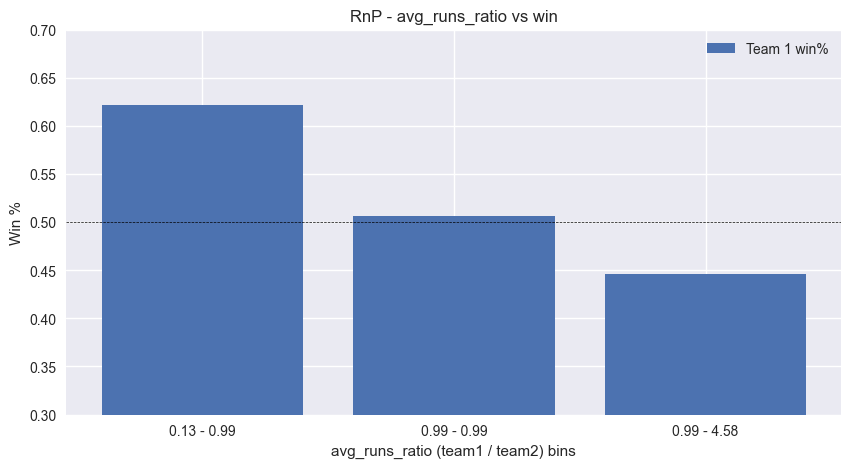

In [120]:
createRnP(df, 'avg_runs_ratio')